In [ ]:
!pip install ipython-sql
!pip install sqlite3

In [2]:
import fetch_data
import pandas as pd
df = fetch_data.fromCSV()
df.head(3)

INFO:fetch_data:Fetching file by url on 2025-02-20 Time 17:47:05+00:00 UTC


,kjønn,utdanning,erfaring,arbeidssted,arbeidssituasjon,fag,lønn,bonus?
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei


In [3]:
# не нравится, что названия колонок на норвежском
# переименовываем названия колонок в DataFrame
df = df.rename(columns = {'kjønn':'sex',
                          'utdanning':'education',
                          'erfaring':'experience',
                          'arbeidssted':'workplace',
                          'arbeidssituasjon':'work_situation',
                          'fag':'subject',
                          'lønn':'salary',
                          'bonus?':'bonus'
                         })
df.head(3)

,sex,education,experience,workplace,work_situation,subject,salary,bonus
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei


In [4]:
# создаем и подключаем БД
import sqlite3
data_base_name = 'hw_03_data_base.db'
con = sqlite3.connect(data_base_name)
cur = con.cursor()

In [5]:
# создаем таблицу data в БД и загружаем в нее данные из DataFrame
# в таблице названия колонок будут уже на английском
table_name = 'data'
df.to_sql(table_name, con=con, if_exists='replace')

2682

In [6]:
# в БД в таблице data 2682 строки
# хотим получить первые 3 строки из этой таблицы
# делаем select запрос с огриничением колиества строк

limit_rows_count = 3

# вариант1. делаем select запрос к таблице data и на стороне sql-сервера берем только 3 строки
# т.е. из sql в python прилетит только 3 строки
# 
print("LIMIT by SQL")
#for row in cur.execute(f"SELECT * FROM {table_name} LIMIT ?", (f"{limit_rows_count}")):

# если limit_rows_count>9 и (str(limit_rows_count)),то получим ошибку 
# ProgrammingError: Incorrect number of bindings supplied. The current statement uses 1, and there are 2 supplied.
# рабочий вариант (str(limit_rows_count),) - отличие в запятой после str(limit_rows_count)
for row in cur.execute(f"SELECT * FROM {table_name} LIMIT ?", (str(limit_rows_count),) ):
    print(row)


# вариант2. делаем select запрос к таблице data
# получаем все 2682 строки
# т.е. из sql в python прилетит 2682 строки
# на стороне python выбираем только первые 3 строки
# получается вариант2 более ресурсо-затратный
# в первом варианте взяли с sql необходимые нам 3 строки и с ними работаем
# во втором варианте взяли c sql 2682 строки и потом выделям из них только 3
print("===============")
print("LIMIT by Python - bad")
i=0
print_rows_count = limit_rows_count
for row in cur.execute(f"SELECT * FROM {table_name}"):
    print(row)
    i+=1
    if i==print_rows_count or i>print_rows_count :
        break;

LIMIT by SQL
(0, 'mann', 4, 7, 'Agder', 'in-house, privat sektor', 'AI / maskinlæring', 865000, 'Nei')
(1, 'mann', 5, 2, 'Nordland', 'in-house, offentlig/kommunal sektor', 'AI / maskinlæring', 756000, 'Nei')
(2, 'mann', 4, 30, 'Oslo', 'konsulent', 'AI / maskinlæring', 1500000, 'Nei')
LIMIT by Python - bad
(0, 'mann', 4, 7, 'Agder', 'in-house, privat sektor', 'AI / maskinlæring', 865000, 'Nei')
(1, 'mann', 5, 2, 'Nordland', 'in-house, offentlig/kommunal sektor', 'AI / maskinlæring', 756000, 'Nei')
(2, 'mann', 4, 30, 'Oslo', 'konsulent', 'AI / maskinlæring', 1500000, 'Nei')


In [7]:
#посчитаем количество людей в БД с разбивкой по полу и месту работы 
# используем select с group by и 
res = cur.execute(f"""
            SELECT sex,
            workplace,
            COUNT(sex)
            FROM {table_name}
            GROUP BY sex, workplace
        """)
res.fetchall()

[('annet / ønsker ikke oppgi', 'Innlandet', 2),
 ('annet / ønsker ikke oppgi', 'Nordland', 1),
 ('annet / ønsker ikke oppgi', 'Oslo', 12),
 ('annet / ønsker ikke oppgi', 'Rogaland', 1),
 ('annet / ønsker ikke oppgi', 'Vestland', 2),
 ('annet / ønsker ikke oppgi', 'Viken', 1),
 ('kvinne', 'Agder', 6),
 ('kvinne', 'Innlandet', 6),
 ('kvinne', 'Møre og Romsdal', 4),
 ('kvinne', 'Nordland', 4),
 ('kvinne', 'Oslo', 250),
 ('kvinne', 'Rogaland', 17),
 ('kvinne', 'Troms og Finnmark', 4),
 ('kvinne', 'Trøndelag', 21),
 ('kvinne', 'Vestfold og Telemark', 11),
 ('kvinne', 'Vestland', 25),
 ('kvinne', 'Viken', 17),
 ('kvinne', 'utlandet', 3),
 ('mann', 'Agder', 88),
 ('mann', 'Innlandet', 58),
 ('mann', 'Møre og Romsdal', 43),
 ('mann', 'Nordland', 40),
 ('mann', 'Oslo', 1215),
 ('mann', 'Rogaland', 144),
 ('mann', 'Troms og Finnmark', 32),
 ('mann', 'Trøndelag', 175),
 ('mann', 'Vestfold og Telemark', 100),
 ('mann', 'Vestland', 231),
 ('mann', 'Viken', 144),
 ('mann', 'utlandet', 25)]

In [8]:
# 'играемся' с sql, pandas и dataframe
# загружаем в datafame результат выполнения запроса к БД.
# колонки в datafame в результате запроса будут с другими именами, т.к. используем as
import pandas as pd
df = pd.read_sql_query(f"""
            SELECT sex as 'Sex',
            workplace as 'Place',
            COUNT(sex) as 'Count'
            FROM {table_name} 
            GROUP BY sex, workplace
        """, con)
df.head(5)

,Sex,Place,Count
0,annet / ønsker ikke oppgi,Innlandet,2
1,annet / ønsker ikke oppgi,Nordland,1
2,annet / ønsker ikke oppgi,Oslo,12
3,annet / ønsker ikke oppgi,Rogaland,1
4,annet / ønsker ikke oppgi,Vestland,2


In [9]:
# не нравятся значения на норвежском
# в БД меняем значения таблице data в колонке sex с норвежского на английский
def update_text_in_column(cur:sqlite3.Cursor,
                          table_name: str,
                          column_name: str,
                          current_value: str,
                          new_value: str):
    res = cur.execute(f"""
            UPDATE {table_name}
            SET {column_name} = '{new_value}'
            WHERE {column_name} = '{current_value}'
        """)
    res.fetchall()
    None

update_text_in_column(cur, table_name, 'sex', 'mann', 'male' )
update_text_in_column(cur, table_name, 'sex', 'kvinne', 'female' )
update_text_in_column(cur, table_name, 'sex', 'annet / ønsker ikke oppgi', 'other / do not wish to state' )

In [10]:
#посчитаем количество людей в БД с разбивкой по полу и месту работы 
res = cur.execute(f"""
            SELECT sex,
            workplace,
            COUNT(sex)
            FROM {table_name}
            GROUP BY sex, workplace
        """)
res.fetchall()

[('female', 'Agder', 6),
 ('female', 'Innlandet', 6),
 ('female', 'Møre og Romsdal', 4),
 ('female', 'Nordland', 4),
 ('female', 'Oslo', 250),
 ('female', 'Rogaland', 17),
 ('female', 'Troms og Finnmark', 4),
 ('female', 'Trøndelag', 21),
 ('female', 'Vestfold og Telemark', 11),
 ('female', 'Vestland', 25),
 ('female', 'Viken', 17),
 ('female', 'utlandet', 3),
 ('male', 'Agder', 88),
 ('male', 'Innlandet', 58),
 ('male', 'Møre og Romsdal', 43),
 ('male', 'Nordland', 40),
 ('male', 'Oslo', 1215),
 ('male', 'Rogaland', 144),
 ('male', 'Troms og Finnmark', 32),
 ('male', 'Trøndelag', 175),
 ('male', 'Vestfold og Telemark', 100),
 ('male', 'Vestland', 231),
 ('male', 'Viken', 144),
 ('male', 'utlandet', 25),
 ('other / do not wish to state', 'Innlandet', 2),
 ('other / do not wish to state', 'Nordland', 1),
 ('other / do not wish to state', 'Oslo', 12),
 ('other / do not wish to state', 'Rogaland', 1),
 ('other / do not wish to state', 'Vestland', 2),
 ('other / do not wish to state', 'Vik

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns


In [12]:
# загружаем в datafame результат выполнения запроса к БД.
df = pd.read_sql_query(f"SELECT * FROM {table_name}", con)
df.head(10)

,index,sex,education,experience,workplace,work_situation,subject,salary,bonus
0,0,male,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,1,male,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,2,male,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei
3,3,male,5,25,Oslo,konsulent,AI / maskinlæring,1200000,Nei
4,4,male,9,18,Oslo,"in-house, privat sektor",AI / maskinlæring,1200000,Nei
5,5,male,2,14,Oslo,"in-house, privat sektor",AI / maskinlæring,839000,Nei
6,6,female,5,9,Oslo,konsulent,AI / maskinlæring,1200000,Ja
7,7,male,6,9,Oslo,"in-house, privat sektor",AI / maskinlæring,980000,Ja
8,8,other / do not wish to state,5,5,Oslo,"in-house, privat sektor",AI / maskinlæring,750000,Nei
9,9,male,5,5,Oslo,konsulent,AI / maskinlæring,910000,Nei


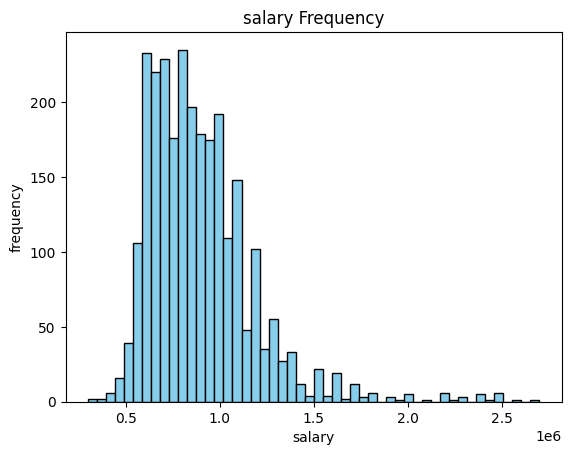

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plottingHistogram(df: pd.DataFrame, xlabel: str, ylabel: str, title: str):
    """
    histogram(df: pd.DataFrame, xlabel: str, ylabel: str, title: str
    Plotting a basic histogram. Adding labels and title
    """

    plt.hist(df[xlabel], bins=50, color='skyblue', edgecolor='black')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    None
   
plottingHistogram(df, 'salary', 'frequency', 'salary Frequency' )
   

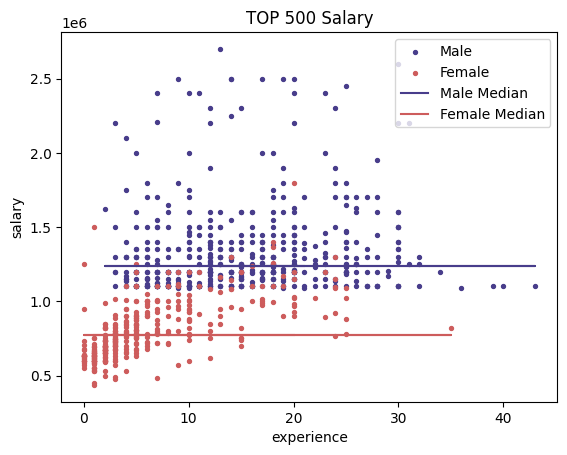

In [14]:
import statistics

def plottingScatter(df: pd.DataFrame):
    
    count_records=500
    df_male = df.query('sex == "male"').sort_values('salary',ascending = False).head(count_records)
    df_female = df.query('sex == "female"').sort_values('salary',ascending = False).head(count_records)

   

    xColumn = 'experience'
    yColumn = 'salary'
    plt.figure()
    plt.xlabel(xColumn)
    plt.ylabel(yColumn)
    
    plt.title(f"TOP {count_records} Salary")
    plt.scatter(df_male[xColumn], df_male[yColumn], 8, color='#483D8B', label='Male')
    plt.scatter(df_female[xColumn], df_female[yColumn], 8, color='#CD5C5C', label='Female')
    
    man_median_salary = statistics.median(df_male['salary'])
    female_median_salary = statistics.median(df_female['salary'])
    plt.plot(df_male[xColumn], [man_median_salary] * df_male[xColumn].count(), markersize=3, color="#483D8B", label='Male Median')
    plt.plot(df_female[xColumn], [female_median_salary] * df_female[xColumn].count(), markersize=3, color="#CD5C5C", label='Female Median')
    
    plt.legend()
    plt.show()
    None

plottingScatter(df)

In [15]:
con.commit()

In [16]:
con.close()